# Cluebot - Exploratory Data Analysis

- Histogram
- Pairplot
- Feature engineering - user credit score using PCA

In [ ]:
import pandas as pd

train_data = pd.read_csv('/Users/robin/Documents/GitHub/Cluebot/train_data.csv')
test_data = pd.read_csv('/Users/robin/Documents/GitHub/Cluebot/test_data.csv')

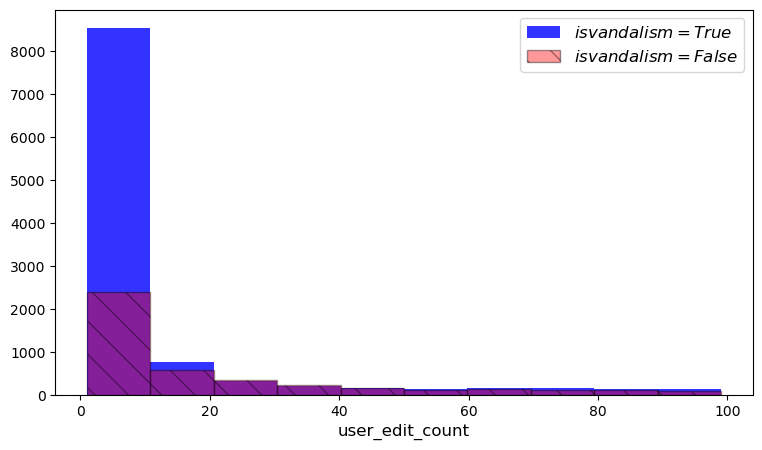

In [7]:
import matplotlib.pyplot as plt

vandal_true = train_data[train_data['isvandalism'] == True]
vandal_false = train_data[train_data['isvandalism'] == False]

vandal_true = vandal_true[vandal_true['user_edit_count'] < 100]
vandal_false = vandal_false[vandal_false['user_edit_count'] < 100]

plt.figure(figsize=(9,5))

plt.hist(vandal_true['user_edit_count'],
            color='blue',
            alpha=.8,
            label="$isvandalism = True$",
            bins=10)

plt.hist(vandal_false['user_edit_count'],
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$isvandalism = False$",
            bins=10)

plt.xlabel("user_edit_count", fontsize=12)
plt.legend(fontsize=12)

plt.show()

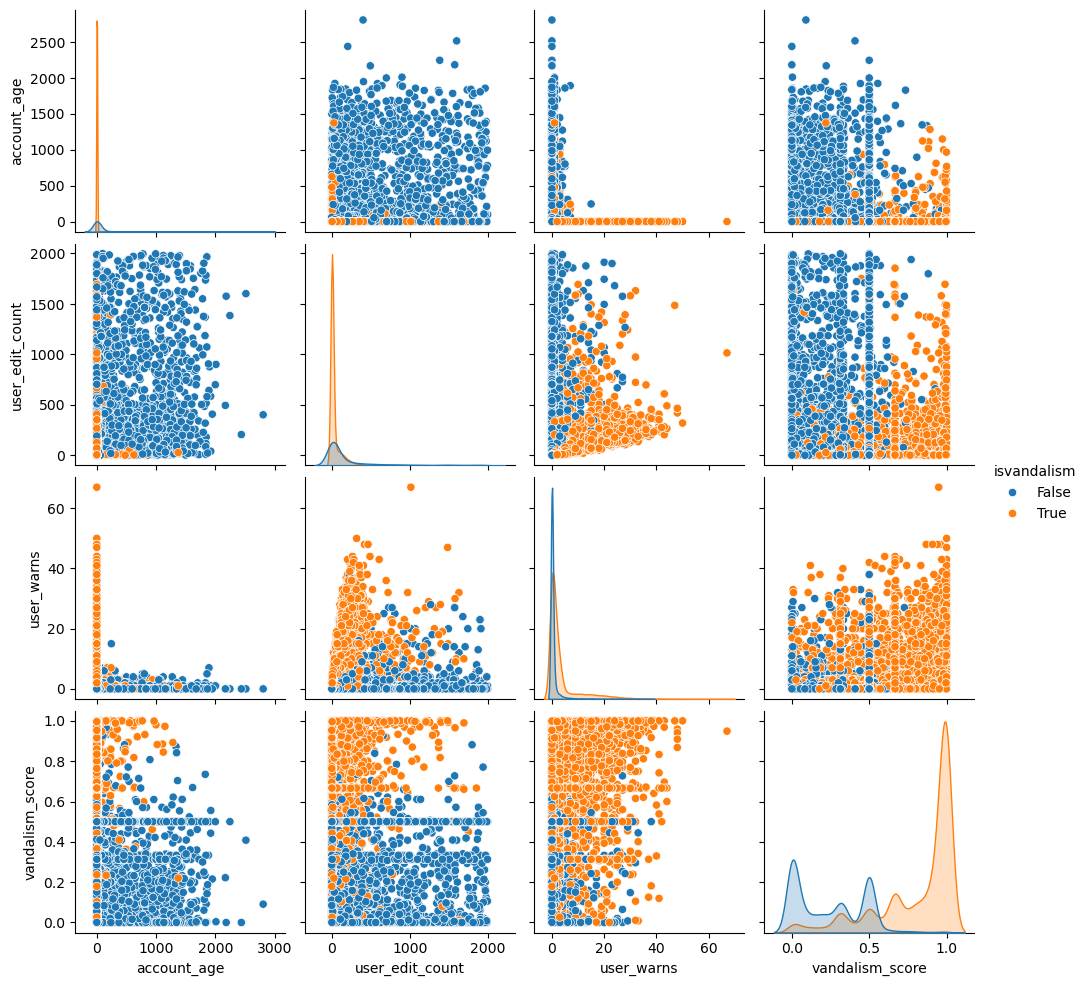

In [ ]:
import seaborn as sns

train_data_lower_user_edit_count = train_data[train_data['user_edit_count'] < 2000]

sns.pairplot(data = train_data_lower_user_edit_count[['account_age', 'user_edit_count', 'user_warns', 'vandalism_score', 'isvandalism']],
                hue = 'isvandalism')

plt.show()

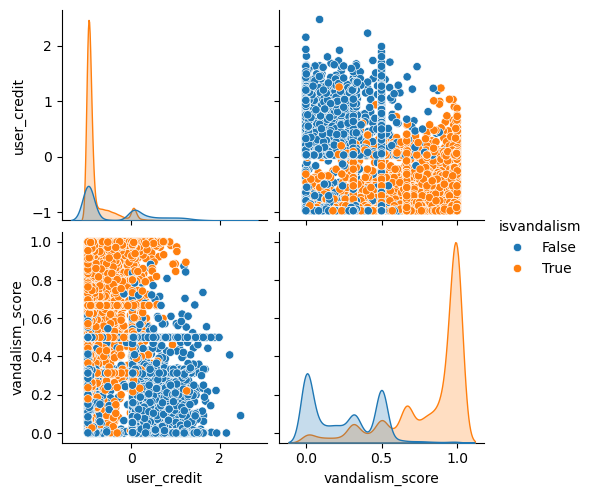

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,EditType,EditID,comment,user,user_edit_count,user_distinct_pages,user_warns,...,added_lines,previous_timestamp,deleted_lines,isvandalism,vandalism_score,account_age,is_IP,pca_coeff1,user_credit,user_credit_2
2830,2830,2830,2830,change,327736616,/* Current squad */,96.251.113.9,64,13,0,...,{{nat fs g player|no=1|pos=GK|name=[[Júlio Cés...,1259090556,{{nat fs g player|no=|pos=GK|name=[[Júlio Césa...,False,7.669059e-02,1,True,-0.972344,-0.972344,0.377204
23060,23060,23060,23060,change,236103359,NaN,Jvirkler,3,1,2,...,"""Theodor Seuss Geisel was born on [[March 2]],...",1220473994,"""Theodor Seuss Geisel was born on [[March 2]],...",True,6.666667e-01,0,False,0.089816,0.089816,-0.640452
12597,12597,12597,12597,change,329903442,/* War strategies of the generals */,Kataryna,433,17,0,...,"""General [[Pretorius]]' war strategy was to ta...",1260036061,"""General [[Pretorius]]' war strategy was to ta...",False,5.000000e-01,173,False,0.181000,0.181000,-0.828085
10704,10704,10704,10704,change,245327113,/* Career */,70.231.229.189,18,9,2,...,[[How to Eat Fried Worms]] is a film which is ...,1223876981,[[How to Eat Fried Worms]] is a film which is ...,True,9.607843e-01,1,True,-0.912664,-0.912664,0.440706
9284,9284,9284,9284,change,394519590,/* Second Moscow University (1918–1930) */,Moonraker,99745,34153,1,...,",""In 1928, new buildings to provide accommodat...",1288754727,NaN,False,1.636520e-12,513,False,0.765898,0.765898,-0.777548


In [ ]:
# PCA Feature - User credit score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features = ['is_IP', 'account_age', 'user_edit_count', 'user_distinct_pages', 'user_warns']

pca_pipe = Pipeline([('scale', StandardScaler()), ('pca', PCA(n_components=2))])
pca_pipe.fit(train_data[features])
pca_coeff1 = pca_pipe.transform(train_data[features])[:,0].reshape(-1, 1)
pca_coeff2 = pca_pipe.transform(train_data[features])[:,1].reshape(-1, 1)

train_data['user_credit'] = pca_coeff1
train_data['user_credit_2'] = pca_coeff2

train_data_lower_user_edit_count = train_data[train_data['user_edit_count'] < 2000]
sns.pairplot(data = train_data_lower_user_edit_count[['user_credit', 'vandalism_score', 'isvandalism']],
                hue = 'isvandalism')

plt.show()

train_data['user_credit'] = pca_coeff1
train_data['user_credit_2'] = pca_coeff2
train_data.to_csv('/Users/robin/Documents/GitHub/Cluebot/train_data.csv')

pca_pipe.fit(test_data[features])
pca_coeff1_test = pca_pipe.transform(test_data[features])[:,0].reshape(-1, 1)
pca_coeff2_test = pca_pipe.transform(test_data[features])[:,1].reshape(-1, 1)

test_data['user_credit'] = pca_coeff1_test
test_data['user_credit_2'] = pca_coeff2_test
test_data.to_csv('/Users/robin/Documents/GitHub/Cluebot/test_data.csv')

train_data.sample(5)
